<a href="https://colab.research.google.com/github/MicahMeadows/CSC-781-GoogleColab/blob/main/Regression_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression Overfitting

This report focuses on the issue of overfitting in regression analysis, where a model fits too closely to the training data and fails to generalize well to new data. Overfitting can occur in any type of regression model, including linear regression, polynomial regression, and other non-linear models.

To address this issue, we will explore several regularization techniques, including Lasso, Ridge, and ElasticNet. These techniques can be used to reduce the complexity of the model and prevent overfitting, while still maintaining good performance on the test data.

The goal of this report is to provide a clear and concise overview of these techniques, as well as their advantages and disadvantages. By the end of this report, you will have a better understanding of how to avoid overfitting in regression analysis, which can be a valuable tool in many different applications.

#### Mount to drive
By mounting to google drive we can load the test data in order to run our regression training and tests.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
!ls drive/MyDrive/csc781-hw5-data
!sed -n 1,5p drive/MyDrive/csc781-hw5-data/test.csv

test.csv  train.csv
x,y
77,79.77515201
21,23.17727887
22,25.60926156
20,17.85738813


#### Load data
With pandas we can load the csv file into data frames to use

In [4]:
import pandas as pd
# load csv
df_train = pd.read_csv('/content/drive/MyDrive/csc781-hw5-data/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/csc781-hw5-data/test.csv')

We drop unavailable data because this would cause issues.

Then, we prepare the data for our models.

In [5]:
# drop invalid data
df_train = df_train.dropna()
df_test = df_test.dropna()

In [6]:
# prepare data for training
x_train = df_train['x']
y_train = df_train['y']
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

x_test = df_test['x']
y_test = df_test['y']
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

#### Visualize Pre trained data
By plotting the training and test set we can see that we can likely get a good result using a regular linear regression. However, we can also see if we can use a polynomial regression in order to get a better result and test overfitting.

[]

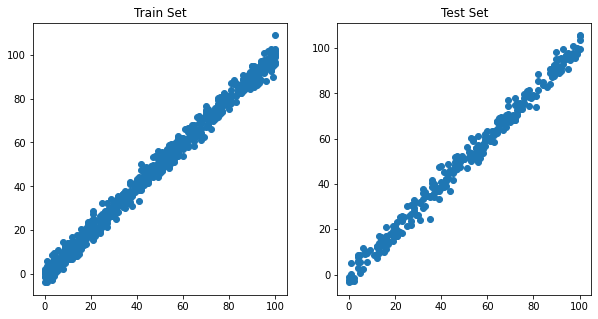

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.scatter(x_train, y_train)
plt.title('Train Set')
plt.subplot(1,2,2)
plt.scatter(x_test, y_test)
plt.title('Test Set')
plt.plot()

## Polynomial Regression Model

In [8]:
import operator
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

## Regular Linear Regression
By training our data using a regular linear regression we can see that we have issues with overfitting. Our line is all over the place and completely misses the data set for the first area of the data. In order to lower this in the next examples we will use regularization methods in order to lower our cost values.

Train Error: 8.98112349648298 123.26127852030372
Test Error: 8.904912808831636 120.16139638796051


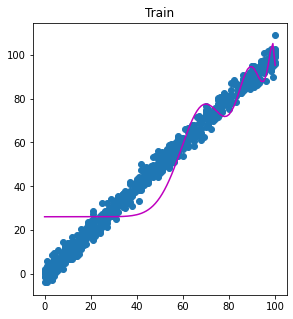

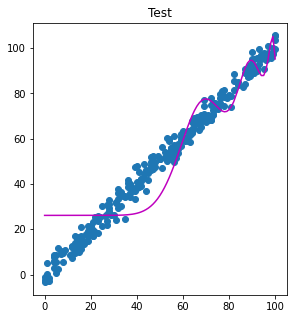

In [10]:
# train
x = x_train
y = y_train

polynomial_features = PolynomialFeatures(degree = 20)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

print('Train Error:', mae(y, y_pred), mse(y, y_pred))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x, y)

# sort the values of x
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.title('Train')
plt.plot(x, y_pred, color='m')

# test
x = x_test
y = y_test
x_poly = polynomial_features.fit_transform(x)
y_pred = model.predict(x_poly)

print('Test Error:', mae(y, y_pred), mse(y, y_pred))
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.scatter(x, y)

# sort the values of x
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.title('Test')
plt.plot(x, y_pred, color='m')

plt.show()

#### Lasso
The Lasso method will shrink some of the coefficients taking the magnitude before fitting order to fix the data issues and provide a better result. In our situation this seemed to work pretty well yielding an MAE of 2.5 on our test data!

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.387e+03, tolerance: 5.914e+01
  model = cd_fast.enet_coordinate_descent(


Train Error: 2.2380073722821243 7.8740576786622585
Test Error: 2.4488423959093626 9.594463350318874


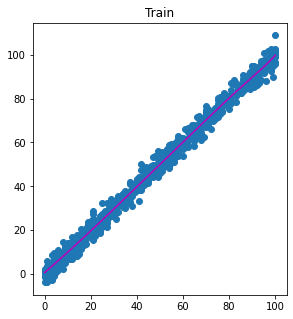

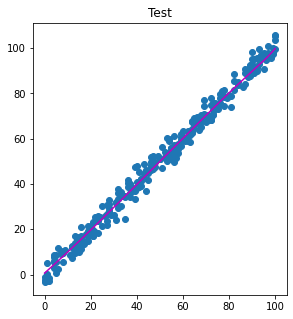

In [11]:
# train
x = x_train
y = y_train

polynomial_features = PolynomialFeatures(degree = 20)
x_poly = polynomial_features.fit_transform(x)

model = linear_model.Lasso()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

print('Train Error:', mae(y, y_pred), mse(y, y_pred))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x, y)

# sort the values of x
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.title('Train')
plt.plot(x, y_pred, color='m')

# test
x = x_test
y = y_test
x_poly = polynomial_features.fit_transform(x)
y_pred = model.predict(x_poly)

print('Test Error:', mae(y, y_pred), mse(y, y_pred))
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.scatter(x, y)

# sort the values of x
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.title('Test')
plt.plot(x, y_pred, color='m')

plt.show()

#### Ridge
The Ridge method will shrink some of the coefficients taking the square before fitting order to fix the data issues and provide a better result. In our situation this did not work very well at all causing an error of over 400 using MAE. This method will not work for our situation.

Train Error: 431.8560878970933 736519.7907074584
Test Error: 497.5393434836955 832648.1030395281


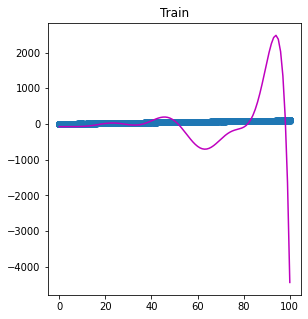

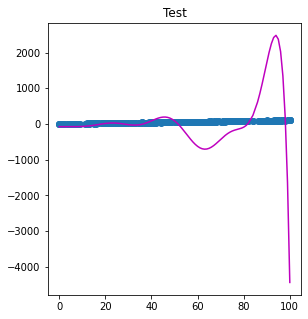

In [12]:
# train
x = x_train
y = y_train

polynomial_features = PolynomialFeatures(degree = 20)
x_poly = polynomial_features.fit_transform(x)

model = linear_model.Ridge()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

print('Train Error:', mae(y, y_pred), mse(y, y_pred))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x, y)

# sort the values of x
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.title('Train')
plt.plot(x, y_pred, color='m')

# test
x = x_test
y = y_test
x_poly = polynomial_features.fit_transform(x)
y_pred = model.predict(x_poly)

print('Test Error:', mae(y, y_pred), mse(y, y_pred))
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.scatter(x, y)

# sort the values of x
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.title('Test')
plt.plot(x, y_pred, color='m')

plt.show()

#### ElasticNet
The third option uses a combined approach where both Ridge and Lasso are used. This approach worked very well as it resulted in an error of just 2.4.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.214e+03, tolerance: 5.914e+01
  model = cd_fast.enet_coordinate_descent(


Train Error: 2.2373171487255474 7.870680413264124
Test Error: 2.4483196601681843 9.590069670949303


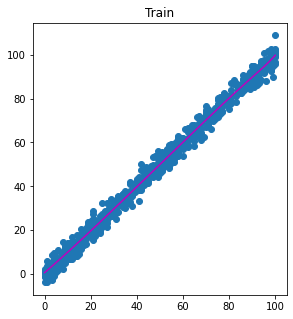

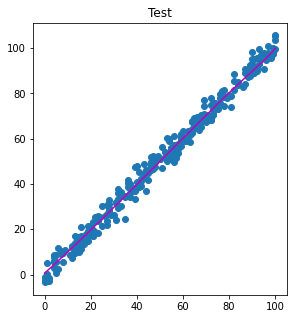

In [13]:
# train
x = x_train
y = y_train

polynomial_features = PolynomialFeatures(degree = 20)
x_poly = polynomial_features.fit_transform(x)

model = linear_model.ElasticNet()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

print('Train Error:', mae(y, y_pred), mse(y, y_pred))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x, y)

# sort the values of x
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.title('Train')
plt.plot(x, y_pred, color='m')

# test
x = x_test
y = y_test
x_poly = polynomial_features.fit_transform(x)
y_pred = model.predict(x_poly)

print('Test Error:', mae(y, y_pred), mse(y, y_pred))
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.scatter(x, y)

# sort the values of x
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.title('Test')
plt.plot(x, y_pred, color='m')

plt.show()